In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



Problem 2.7, the times are given in minutes. For question (a) Python users may wish to try the two commands scipy.stats.expon.fit(d) and scipy.stats.expon.fit(d,floc=0) where d is an array containing the data (see if you can figure out what the outputs are and what the difference between the two calls is). Another angle on this problem can be obtained by trying also a likelihood fit to the histogram, e.g. by using equation (2.89) in the book, or - better - equation (3.27) which is an improved version of equation (2.89). As a final "meta-question" you could consider what the impact was in question (b) of cutting off the data after 15 minutes.
If time, look also at problem 2.3.

In [4]:
# Load data. 40 Radiactive decay measurements in minutes
data = np.array([4.99, 4.87, 2.59, 3.04, 3.39, 6.20, 10.61, 7.64, 3.92, 5.33, 4.85, 2.39, 4.16, 6.74, 3.53, 5.86, 5.41, 26.25, 4.40, 10.79, 7.08, 2.86, 33.92, 3.03, 0.98, 5.63, 4.89, 2.26, 10.49, 6.51, 7.36, 2.13, 6.45, 2.29, 21.15, 4.07, 4.34, 5.38, 7.69, 4.93])




# Questions A: 
Maybe use these commands:
scipy.stats.expon.fit(d) and scipy.stats.expon.fit(d,floc=0)

In [5]:
# Want to make a histogram

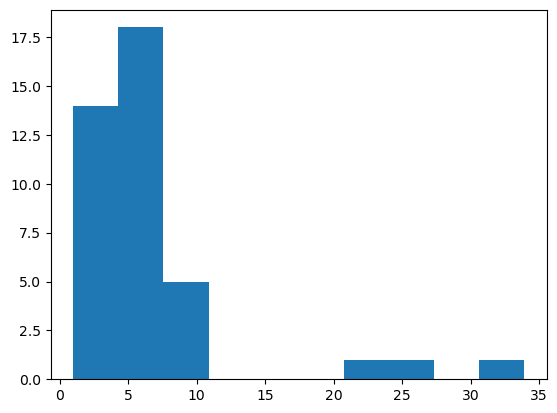

In [6]:
# Want to make a histogram of the data
np.histogram(data, bins=20)

# And plot it
plt.hist(data, bins=10)


# We don't want to display the arrays, just the plot
plt.show()

a,b 0.0 6.760000000000001


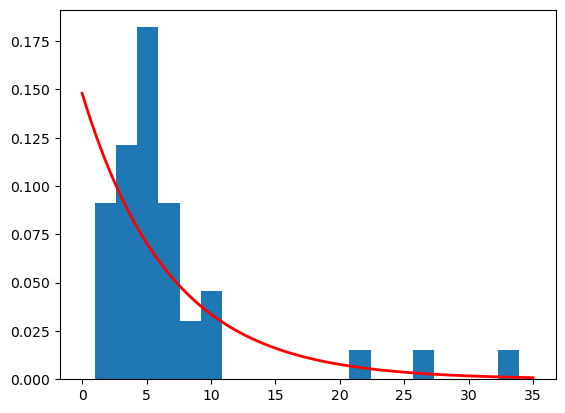

In [15]:
# The exercise ask to make a exponential fit to the data
# We can do this by using the stats.expon.fit function
a,b = stats.expon.fit(data, floc = 0)

print("a,b", a,b)

# Now I want to show the fit with the histogram
# First I need to make a x-axis
x = np.linspace(0, 35, 1000)

# Then I can plot the histogram and the fit
plt.hist(data, bins=20, density=True)
plt.plot(x, stats.expon.pdf(x, a, b), 'r-', lw=2)


a,b 0.9 5.86


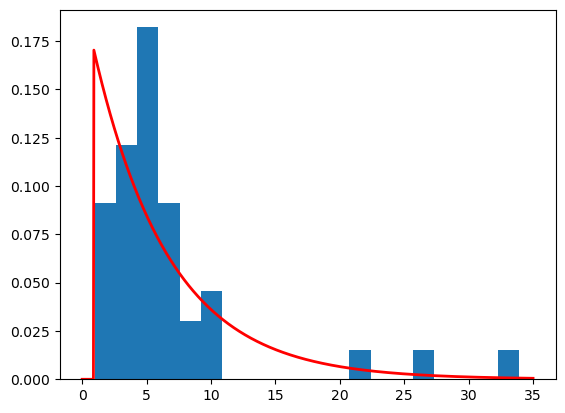

In [23]:
# The exercise ask to make a exponential fit to the data
# We can do this by using the stats.expon.fit function
a,b = stats.expon.fit(data, floc = 0.9)

print("a,b", a,b)

# Now I want to show the fit with the histogram
# First I need to make a x-axis
x = np.linspace(0, 35, 1000)

# Then I can plot the histogram and the fit
plt.hist(data, bins=20, density=True)
plt.plot(x, stats.expon.pdf(x, a, b), 'r-', lw=2)


The use of floc = 0, determines when the distribution starts
- This can be used to check if the experiment is done correctly



In the example below
- When do I need to bin to get good results?





In [27]:
likelihood(data, 2)

(array([1, 0], dtype=int64), array([0, 1, 2]))

In [18]:
1 / 6.7

0.14925373134328357

In [6]:
# Fit parameters
a,b 

(0.0, 6.760000000000001)

We see that they don't match. More theory is needed.

Questions: 
- What does the expon fit fits?
    - We don't know if it takes the midpoint of the histograms
- What theory can be used for binned data?
    - Binned ML page 59
- How do I determine the binsize or number of bins.
    - We want a little under half of the resolution to fit to. "ASK WAY AGAIN"


We handle each question methodically, and we use the tools we have learned in the course.



# ML binned data



Struggles: 
- How do we get the expected counts: nu
-- Fit each bin as if it was poison


What does density = True do?




(array([0.12143291, 0.01897389, 0.        , 0.00758956, 0.00379478]),
 array([ 0.98 ,  7.568, 14.156, 20.744, 27.332, 33.92 ]),
 <BarContainer object of 5 artists>)

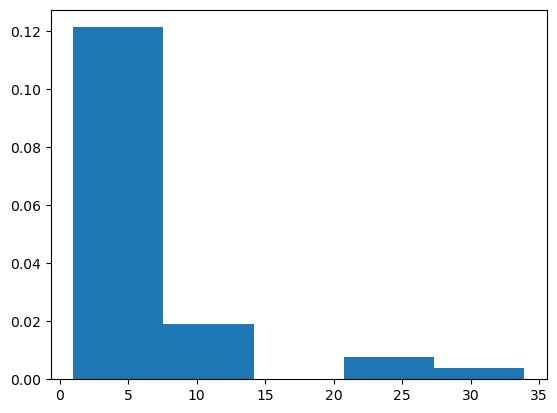

In [62]:
# We define number of batches
B = 5

hist = np.histogram(data, bins=B, density = True)
plt.hist(data, bins= B, density=True)
# plt.show()

In [63]:
# With bins = 5


hist
cData = data.copy()


cData.sort()
cData

array([ 0.98,  2.13,  2.26,  2.29,  2.39,  2.59,  2.86,  3.03,  3.04,
        3.39,  3.53,  3.92,  4.07,  4.16,  4.34,  4.4 ,  4.85,  4.87,
        4.89,  4.93,  4.99,  5.33,  5.38,  5.41,  5.63,  5.86,  6.2 ,
        6.45,  6.51,  6.74,  7.08,  7.36,  7.64,  7.69, 10.49, 10.61,
       10.79, 21.15, 26.25, 33.92])

In [64]:
# Now data is sorted, the first bin is examined
# With values from 0.98 to 7.08: 
# Return the data with values between 0.98 and 7.08
bin1 = cData[(cData >= 0.98) & (cData <= 7.08)]

# Also make one for the 7.08 to 14.156 bin
bin2 = cData[(cData >= 7.08) & (cData <= 14.156)]

# And so on
bin3 = cData[(cData >= 14.156) & (cData <= 20.744)]
bin4 = cData[(cData >= 20.744) & (cData <= 27.332)]
bin5 = cData[(cData >= 27.332) & (cData <= 33.92)]


4.338709677419355


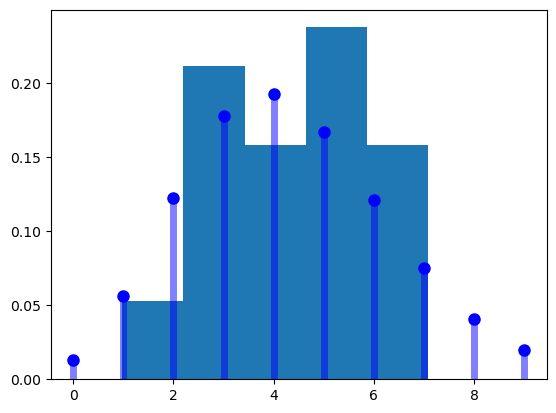

In [65]:

fig, ax = plt.subplots(1, 1)

bin1D = np.histogram(bin1, bins=5, density=True)

# plt.hist(bin1, bins=5, density=True)


# I want to fit with possion distribution of bin1
# I need to find the mean of bin1
mean = np.mean(bin1)
print(mean)
x1 = np.linspace(0, 6, 1000)

# Now I can fit the data with possion distribution
plt.hist(bin1, bins=5, density=True)
# plt.plot(x1, stats.poisson.pmf(x, mean), 'r-', lw=2)


mu = np.mean(bin1)
# rv = stats.poisson(mu)
# ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
#         label='frozen pmf')
# ax.legend(loc='best', frameon=False)
# plt.show()


x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)


# I probably need to normalize the data
# I can do this by dividing the data with the sum of the data
# bin1D = bin1D[0]/np.sum(bin1D[0])

(array([0.77011937, 0.        , 0.        , 0.        , 0.57758953]),
 array([ 7.08 ,  7.822,  8.564,  9.306, 10.048, 10.79 ]),
 <BarContainer object of 5 artists>)

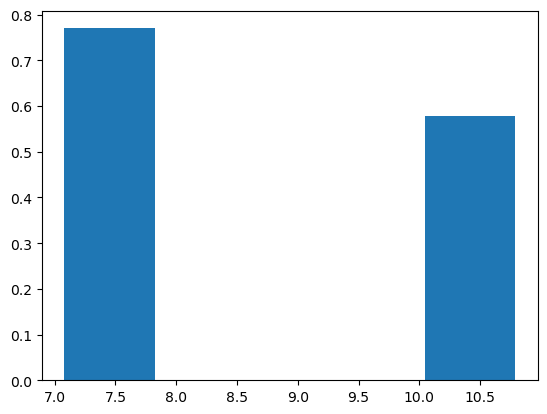

In [11]:
fig, ax = plt.subplots(1, 1)
# Do the same rutine for the other bins
bin2D = np.histogram(bin2, bins=5, density=True)
# bin2D = bin2D[0]/np.sum(bin2D[0])
plt.hist(bin2, bins=5, density=True)


In [12]:
# We want to find the means for all the bins
bins = np.array([bin1, bin2, bin3, bin4, bin5])
for i in bins:
    # print(i)

    mean = np.mean(i)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

# Important
So far, mu has been used, but that is not the parameter I am not sure that is the right parameter. For Poisson distribution, the mean is given as np.sqrt(N) (Not quite), so if this agree with the calculated value, it might help.

By reading on https://en.wikipedia.org/wiki/Poisson_distribution, the mean is given as lambda. 
This tells us, that it IS the MEAN!


In [ ]:
# len(bins[2])

0

In [ ]:
mean_ = [np.mean(i, axis = 0) for i in bins]
# mean_sqrt = [np.sqrt(len(i)) for i in bins]
print("mean", mean_)
# print("mean_sqrt", mean_sqrt)
# for i in bins:
#     if len(bins) == 0:
#         i = [0]
    
#     else:
#         np.mean(i, axis = 0)


    

mean [4.338709677419355, 8.80857142857143, nan, 23.7, 33.92]


In [ ]:
# Now we want to us ML to find the best fit for the data, 

def lnML(x, mu):
    return np.sum(n)





NameError: name 'asd' is not defined

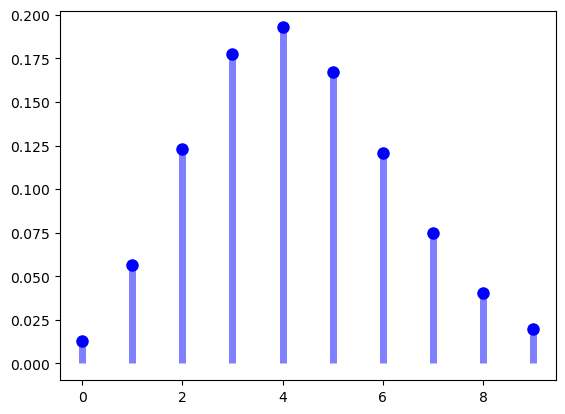

In [ ]:
stats.poisson.fit(bin1)

AttributeError: 'poisson_gen' object has no attribute 'fit'

In [ ]:
# We want to take the elements in the first bin and make a poison fit to it
# We can do this by using the stats.poisson.fit function
# a,b = stats.poisson.fit(hist[0], floc = 0)




# Now we have tried different things, lets make it general.



What is the resolution?
-Approach: 
-- find min(data), use half of this value as the bin sizes




In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

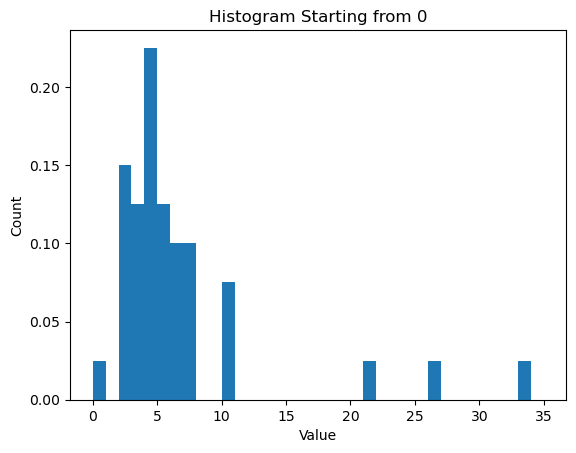

In [16]:


# Sample data
data = np.array([4.99, 4.87, 2.59, 3.04, 3.39, 6.20, 10.61, 7.64, 3.92, 5.33, 4.85, 2.39, 4.16, 6.74, 3.53, 5.86, 5.41, 26.25, 4.40, 10.79, 7.08, 2.86, 33.92, 3.03, 0.98, 5.63, 4.89, 2.26, 10.49, 6.51, 7.36, 2.13, 6.45, 2.29, 21.15, 4.07, 4.34, 5.38, 7.69, 4.93])

# Define the bin edges, starting from 0
bins = np.arange(0, np.max(data) + 2)  # Add 2 to include the maximum value

# Create the histogram
hist, bin_edges = np.histogram(data, bins=bins, density = True)

# Plot the histogram
plt.bar(bin_edges[:-1], hist, width=1.0, align='edge')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram Starting from 0')
plt.show()


In [44]:
# After plotting, we want to see the values of the hist: 
print("hist", hist)
print("bin_edges", bin_edges)

hist [1 0 6 5 9 5 4 4 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0]
bin_edges [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


In [45]:
# # Identify the bin of interest (e.g., bin 2)
# bin_index = 3

# # Use boolean indexing to get values in that bin
# values_in_bin = data[(data >= bin_edges[bin_index]) & (data < bin_edges[bin_index + 1])]

# print("Values in Bin", bin_index, ":", values_in_bin)


In [74]:
# Want to make the above general for all bins
# We can do this by using a for loop
# We want to make a list of all the bins
bins = np.arange(0, np.max(data) + 2)  # Add 2 to include the maximum value
bins_mean = [np.mean(data[(data >= bins[i]) & (data < bins[i+1])]) for i in range(0, len(bins) - 1)]

# for i in range(0, len(bins)):
#     # print(i)
#     # print(bins[i])
#     # print(bins[i+1])
#     # print(data[(data >= bins[i]) & (data < bins[i+1])])
#     # print("Values in Bin", i, ":", data[(data >= bins[i]) & (data < bins[i+1])])
#     print("Values in Bin", i, ":", data[(data >= bins[i]) & (data < bins[i+1])])


# We want to make nan values to 0
bins_mean = np.nan_to_num(bins_mean)
bins_mean


array([ 0.98      ,  0.        ,  2.42      ,  3.382     ,  4.61111111,
        5.522     ,  6.475     ,  7.4425    ,  0.        ,  0.        ,
       10.63      ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 21.15      ,  0.        ,  0.        ,  0.        ,
        0.        , 26.25      ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 33.92      ,  0.        ])

In [76]:
# values_in_bins = [data[(data >= bin_edges[bin_index]) & (data < bin_edges[bin_index + 1])] for bin_index in range(0, len(bin_edges) - 1)]

# plt.hist(values_in_bins[3], bins=10, density=True)


In [49]:

# np.histogram(data, bins=np.arange(max(data) + 2))[0]

In [77]:
def poisson_function(k, lamb):
    return poisson.pmf(k, lamb)

# Initial guess for the Poisson parameter (lambda)
initial_guess = bins_mean.copy()
initial_guess = np.nan_to_num(initial_guess)

# params, params_covariance = curve_fit(poisson_function, np.arange(max(data) + 1), values_in_bins[0], p0=initial_guess[0])
# fitted_lambda = params[0]

In [54]:
# # bins_test = np.arange(2, 3, 0.1) # x-axis))
# bins_test = np.arange(2, 3, 0.1) # x-axis))

In [17]:
# Define the bin edges, starting from 0
bins = np.arange(0, np.max(data) + 2)  # Add 2 to include the maximum value

# Create the histogram
hist, bin_edges = np.histogram(data, bins=bins, density = True)


print("len(hist)", len(hist))
print("len(bin_edges)", len(bin_edges))
print("len(bins_mean", len(bins_mean))

# Plot the histogram
plt.bar(bin_edges[:-1], hist, width=1.0, align='edge')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram Starting from 0')
plt.show()

len(hist) 35
len(bin_edges) 36


NameError: name 'bins_mean' is not defined

In [85]:
# We have the following: 
# print("values_in_bins", values_in_bins)
print("bins_mean", bins_mean)

# The total count in each is 
ni = hist.copy()
print("ni", ni)


# We want to combine the means and the hist (n_i):
print("B:", len(bins_mean))

# Now we use the formula 
# lnL = -B*mu + sum(n_i*ln(mu))


bins_mean [ 0.98        0.          2.42        3.382       4.61111111  5.522
  6.475       7.4425      0.          0.         10.63        0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         21.15        0.          0.
  0.          0.         26.25        0.          0.          0.
  0.          0.          0.         33.92        0.        ]
ni [1 0 6 5 9 5 4 4 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0]
B: 35


In [87]:
lnL = np.sum(ni * np.log(bins_mean), axis = 0) - np.sum(bins_mean)

C:\Users\barit\AppData\Local\Temp\ipykernel_18056\230555265.py:1: RuntimeWarning: divide by zero encountered in log
  lnL = np.sum(ni * np.log(bins_mean), axis = 0) - np.sum(bins_mean)
C:\Users\barit\AppData\Local\Temp\ipykernel_18056\230555265.py:1: RuntimeWarning: invalid value encountered in multiply
  lnL = np.sum(ni * np.log(bins_mean), axis = 0) - np.sum(bins_mean)


In [101]:


mask = (bins_mean != 0)


np.sum(ni[mask] * np.log(bins_mean[mask]), axis = 0) - np.sum(ni[mask])


# Probably not good, that it is above 0. NOT NORMALIZED?


26.109631971208472

In [ ]:


def likelihood(n, L):


    B = len(n)
    bins = np.arange(0, np.max(data) + 2)  # Add 2 to include the maximum value
    nu_i = [np.mean(n[(n >= bins[i]) & (n < bins[i+1])]) for i in range(0, len(bins) - 1)]



    log_likelihood = 0.0
    # print(n, len(n))
    v_i = 
    np.sum(n * np.log(v_i))



In [99]:
# len(bins_mean[mask])

# len(ni[mask])

11

In [87]:
def probBinned(t_i, t_f, lambda_):
    N = 1
    return N * np.exp(-1 * lambda_ * t_i) * (1 - np.exp(-1 * lambda_ * (t_f - t_i)))


def likelihood(data, lambda_):
    B = 3

    hist, bin_edges = np.histogram(data, bins = B, density = True)
    # plt.hist(data, bins = B, density = True)


    # for i in range(0, B):
    #     if i < B - 1
    #         probBinned(bin_edges[i], bin_edges[i + 1])
    #     else:
    #         probBinned(bin_edges[i], bin_edges[i + 1])


    probBins = []

    for i in range(0, B):
        if i < (B - 1):
            probBins.append(probBinned(bin_edges[i], bin_edges[i + 1], lambda_))
        else:
            probBins.append(probBinned(bin_edges[i - 1], bin_edges[B], lambda_))

    # probBinned(bin_edges)



    # Now we make maximum likelihood (NEGATIVE)
    lnL = -np.sum(hist * np.log(probBins))


    # probBinned()

    return lnL

    


[0.1        0.1030303  0.10606061 0.10909091 0.11212121 0.11515152
 0.11818182 0.12121212 0.12424242 0.12727273 0.13030303 0.13333333
 0.13636364 0.13939394 0.14242424 0.14545455 0.14848485 0.15151515
 0.15454545 0.15757576 0.16060606 0.16363636 0.16666667 0.16969697
 0.17272727 0.17575758 0.17878788 0.18181818 0.18484848 0.18787879
 0.19090909 0.19393939 0.1969697  0.2        0.2030303  0.20606061
 0.20909091 0.21212121 0.21515152 0.21818182 0.22121212 0.22424242
 0.22727273 0.23030303 0.23333333 0.23636364 0.23939394 0.24242424
 0.24545455 0.24848485 0.25151515 0.25454545 0.25757576 0.26060606
 0.26363636 0.26666667 0.26969697 0.27272727 0.27575758 0.27878788
 0.28181818 0.28484848 0.28787879 0.29090909 0.29393939 0.2969697
 0.3        0.3030303  0.30606061 0.30909091 0.31212121 0.31515152
 0.31818182 0.32121212 0.32424242 0.32727273 0.33030303 0.33333333
 0.33636364 0.33939394 0.34242424 0.34545455 0.34848485 0.35151515
 0.35454545 0.35757576 0.36060606 0.36363636 0.36666667 0.36969

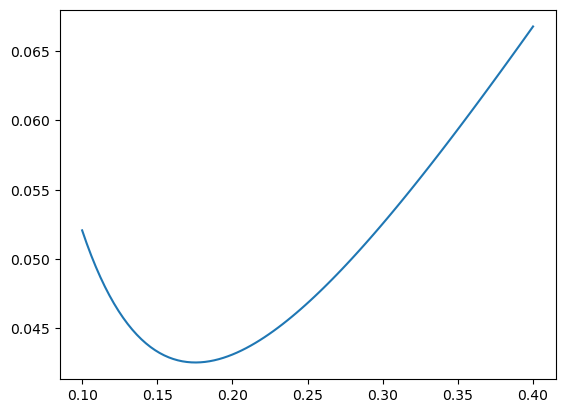

In [96]:
lambdas = np.linspace(0.1,0.4,100)
print(lambdas)
# likelihood(data, lambdas)


ys = [likelihood(data, i) for i in lambdas]
# print(ys)

plt.plot(lambdas, ys)
plt.show()

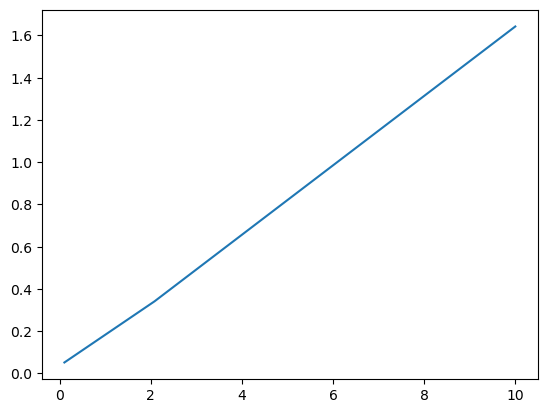

TypeError: list indices must be integers or slices, not numpy.float64